In [1]:
try:
  %tensorflow_version 2.x
except:
  pass

from matplotlib import style

import logging
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf

tf.get_logger().setLevel(logging.ERROR)
style.use('ggplot')

print(tf.__version__)

TensorFlow 2.x selected.
2.0.0


### Prepare the Data

In [2]:
def prepare_features():
  feature_arr = np.array([], dtype=float)
  for i in range(0, 100, 1):
    feature_arr = np.append(feature_arr, random.randint(-50, 50))
  return feature_arr

feature_arr = prepare_features()

def prepare_labels(feature_arr):
  label_arr = np.array([])
  for feature in feature_arr:
    label = (feature * 1.8) + 32
    label_arr = np.append(label_arr, label)
  return label_arr

label_arr = prepare_labels(feature_arr)

print("Feature Array : \n{}".format(feature_arr))
print("Feature Array Dimension : {}".format(feature_arr.ndim))
print("Label Array : \n{}".format(label_arr))

Feature Array : 
[-19.  19.  21. -26. -28.  -3. -46.   0.  13.  46.  34. -26.  15.  21.
  33. -11.  -1.   8.  -1.   6.  -7. -23.  22. -10.  15. -50. -48.  19.
 -30.  -3. -45. -22. -23.  47.  48.  -2.   9. -25. -25.  22.  -8. -28.
 -28. -11. -45.  12. -26.  31.  44.  24.  43. -11.  43. -48. -31.  36.
  30.  34. -26. -27. -39.  -2. -25.  33.  -3.  17.  22.  26.  44. -45.
 -36.   0. -43. -11.  12. -35.  22. -17.  -9.  -7.  35. -44.  43.   0.
   8. -15.  41.  27. -35. -49.  14. -23. -20. -38. -31. -16.  15.  27.
 -42.  18.]
Feature Array Dimension : 1
Label Array : 
[ -2.2  66.2  69.8 -14.8 -18.4  26.6 -50.8  32.   55.4 114.8  93.2 -14.8
  59.   69.8  91.4  12.2  30.2  46.4  30.2  42.8  19.4  -9.4  71.6  14.
  59.  -58.  -54.4  66.2 -22.   26.6 -49.   -7.6  -9.4 116.6 118.4  28.4
  48.2 -13.  -13.   71.6  17.6 -18.4 -18.4  12.2 -49.   53.6 -14.8  87.8
 111.2  75.2 109.4  12.2 109.4 -54.4 -23.8  96.8  86.   93.2 -14.8 -16.6
 -38.2  28.4 -13.   91.4  26.6  62.6  71.6  78.8 111.2 -49.  -32.8 

In [3]:
input_shape = feature_arr.ndim
units = 1
print("Input Shape : {}".format(input_shape))
print("Units : {}".format(units))

Input Shape : 1
Units : 1


### Create Model

In [4]:
l_0 = tf.keras.layers.Dense(units=units, input_shape=(input_shape, ))
print(l_0)
model_1 = tf.keras.Sequential([l_0])
print(model_1)

### Compile the Model, with Loss and Optimizer functions

In [0]:
model_1.compile(loss="mean_squared_error", 
                optimizer=tf.keras.optimizers.Adam(0.1))

### Train the Model

In [6]:
history = model_1.fit(feature_arr, label_arr, epochs=1000, verbose=False)
print("Finished training the model.")

Finished training the model.


In [7]:
print(history.history["loss"])

[9820.775234375, 7777.63859375, 6215.98787109375, 4790.980693359375, 3695.92888671875, 2783.32517578125, 2095.50841796875, 1594.2714453125, 1232.4880102539062, 1015.807548828125, 872.4969799804687, 799.5023754882812, 768.7260888671875, 751.95326171875, 734.8935986328125, 715.4553588867187, 693.75236328125, 671.6120947265625, 651.1252734375, 631.3549438476563, 612.6183569335938, 595.0221984863281, 579.4163061523437, 562.6847143554687, 547.2903442382812, 531.451328125, 515.44654296875, 500.6045703125, 485.54405029296873, 471.42760009765624, 456.19930541992187, 441.62716796875, 428.7801940917969, 415.0240686035156, 402.2770715332031, 390.0319873046875, 377.9468115234375, 366.01573486328124, 354.04668212890624, 342.47133178710936, 331.58439208984373, 320.6885546875, 310.7092565917969, 301.5800842285156, 291.1965808105469, 279.58288330078125, 271.1328869628906, 262.0066931152344, 253.05599731445312, 244.28543212890625, 236.02849853515625, 227.17661560058593, 219.60846435546875, 211.84628479

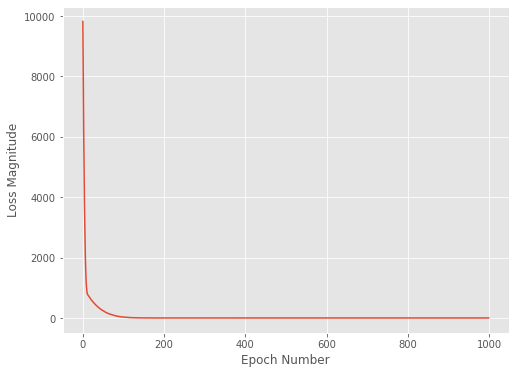

In [8]:
plt.figure(figsize=(8, 6))
plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(history.history["loss"])
plt.show()

In [9]:
print(model_1.predict([100.0, 0.0, -60, 60, 89, 95]))

[[211.99998 ]
 [ 31.999987]
 [-76.000015]
 [139.99998 ]
 [192.19998 ]
 [202.99998 ]]


$F = (C\times1.8) + 32$

Weight $w_1=1.8$ and Bias $b=32$

In [10]:
print("These are the Layer Weights : {}".format(l_0.get_weights()))

These are the Layer Weights : [array([[1.8]], dtype=float32), array([31.999987], dtype=float32)]


### Self Exloration

In [11]:
exp_arr_1 = np.array([[[1, 2, 0, 4, 3, 5], [3, 4, 0, 4, 3, 5], [1, 2, 0, 4, 3, 5], [3, 4, 0, 4, 3, 5], [1, 2, 0, 4, 3, 5]], 
                      [[1, 3, 0, 4, 3, 5], [4, 5, 0, 4, 3, 5], [1, 2, 0, 4, 3, 5], [3, 4, 0, 4, 3, 5], [1, 2, 0, 4, 3, 5]], 
                      [[1, 4, 0, 4, 3, 5], [5, 6, 0, 4, 3, 5], [1, 2, 0, 4, 3, 5], [3, 4, 0, 4, 3, 5], [1, 2, 0, 4, 3, 5]], 
                      [[1, 2, 0, 4, 3, 5], [3, 4, 0, 4, 3, 5], [1, 2, 0, 4, 3, 5], [3, 4, 0, 4, 3, 5], [1, 2, 0, 4, 3, 5]], 
                      [[1, 3, 0, 4, 3, 5], [4, 5, 0, 4, 3, 5], [1, 2, 0, 4, 3, 5], [3, 4, 0, 4, 3, 5], [1, 2, 0, 4, 3, 5]], 
                      [[1, 2, 0, 4, 3, 5], [3, 4, 0, 4, 3, 5], [1, 2, 0, 4, 3, 5], [3, 4, 0, 4, 3, 5], [1, 2, 0, 4, 3, 5]], 
                      [[1, 3, 0, 4, 3, 5], [4, 5, 0, 4, 3, 5], [1, 2, 0, 4, 3, 5], [3, 4, 0, 4, 3, 5], [1, 2, 0, 4, 3, 5]]])
print(exp_arr_1, "\n")
print(exp_arr_1.shape)

[[[1 2 0 4 3 5]
  [3 4 0 4 3 5]
  [1 2 0 4 3 5]
  [3 4 0 4 3 5]
  [1 2 0 4 3 5]]

 [[1 3 0 4 3 5]
  [4 5 0 4 3 5]
  [1 2 0 4 3 5]
  [3 4 0 4 3 5]
  [1 2 0 4 3 5]]

 [[1 4 0 4 3 5]
  [5 6 0 4 3 5]
  [1 2 0 4 3 5]
  [3 4 0 4 3 5]
  [1 2 0 4 3 5]]

 [[1 2 0 4 3 5]
  [3 4 0 4 3 5]
  [1 2 0 4 3 5]
  [3 4 0 4 3 5]
  [1 2 0 4 3 5]]

 [[1 3 0 4 3 5]
  [4 5 0 4 3 5]
  [1 2 0 4 3 5]
  [3 4 0 4 3 5]
  [1 2 0 4 3 5]]

 [[1 2 0 4 3 5]
  [3 4 0 4 3 5]
  [1 2 0 4 3 5]
  [3 4 0 4 3 5]
  [1 2 0 4 3 5]]

 [[1 3 0 4 3 5]
  [4 5 0 4 3 5]
  [1 2 0 4 3 5]
  [3 4 0 4 3 5]
  [1 2 0 4 3 5]]] 

(7, 5, 6)


### Practice with more Dense Layers

### Prepare Data

In [12]:
prac_feature_arr_1 = prepare_features()
prac_label_arr_1 = prepare_labels(prac_feature_arr_1)

print("Features : \n{}".format(prac_feature_arr_1))
print("Labels : \n{}".format(prac_label_arr_1))

Features : 
[-32.  33.  17.  34.  18.  43.   6. -23.  16.  18. -14.  40.  15. -50.
 -11. -37.  29.  16. -14.  20.  34.  18. -47. -45. -24.  21.  12.  -9.
  -3.  28. -48.  21.   6.  47.  -1. -39. -36.  36.  13.  16. -47. -32.
  49.  -1.   3. -39.  45. -41.   8. -33.   5.  30. -27.  24.  31.  49.
  42. -15. -20.  33. -18.  19.  37.  21.  13. -17. -40.   2. -24.  44.
  24. -20.  45.  27.  -8. -47. -15.  17. -42.  21. -19. -40.  33.   0.
 -30.   3. -13.  -6.  -1.   4.  32.  -9.  23. -45.  27.  45. -40. -45.
  -2.  14.]
Labels : 
[-25.6  91.4  62.6  93.2  64.4 109.4  42.8  -9.4  60.8  64.4   6.8 104.
  59.  -58.   12.2 -34.6  84.2  60.8   6.8  68.   93.2  64.4 -52.6 -49.
 -11.2  69.8  53.6  15.8  26.6  82.4 -54.4  69.8  42.8 116.6  30.2 -38.2
 -32.8  96.8  55.4  60.8 -52.6 -25.6 120.2  30.2  37.4 -38.2 113.  -41.8
  46.4 -27.4  41.   86.  -16.6  75.2  87.8 120.2 107.6   5.   -4.   91.4
  -0.4  66.2  98.6  69.8  55.4   1.4 -40.   35.6 -11.2 111.2  75.2  -4.
 113.   80.6  17.6 -52.6   5.   62

### Create the Model

In [0]:
l_0_prac = tf.keras.layers.Dense(units=4, input_shape=(prac_feature_arr_1.ndim, ))
l_1_prac = tf.keras.layers.Dense(units=4)
l_2_prac = tf.keras.layers.Dense(units=1)
model_prac_1 = tf.keras.Sequential([l_0_prac, l_1_prac, l_2_prac])

### Compile the Model

In [0]:
model_prac_1.compile(loss="mean_squared_error", 
                     optimizer=tf.keras.optimizers.Adam(0.1))

### Fit the Model

In [15]:
hist_prac_1 = model_prac_1.fit(prac_feature_arr_1, prac_label_arr_1, epochs=1000, verbose=False)
print("Finished training the model.")

Finished training the model.


In [16]:
print(hist_prac_1.history["loss"])

[4619.089152832032, 2957.3530859375, 851.7863720703125, 1461.9361181640625, 1428.1285986328126, 666.3426696777344, 653.3481591796875, 715.7529907226562, 335.59993408203127, 332.1120593261719, 183.4564111328125, 96.21692504882813, 66.73275665283204, 13.539574127197266, 32.117661118507385, 5.355164432525635, 18.690798110961914, 9.27046616077423, 10.37753433227539, 5.392039613723755, 2.1351708221435546, 1.4296833881735802, 0.8844826626777649, 1.3341552376747132, 0.7007340598106384, 0.5877838885784149, 0.23527273654937744, 0.08912548519670964, 0.1277465784549713, 0.04542307630181312, 0.08047140717506408, 0.028243953287601473, 0.027338118590414524, 0.004034089632332325, 0.008767929337918758, 0.004587487131357193, 0.006278345622122288, 0.003974831141531468, 0.0009229716612026096, 0.0013855516794137658, 0.0005320108018349856, 0.0007157871953677387, 0.0005886586476117373, 0.0001929845951963216, 0.0005084895087202313, 0.00016906787524931133, 7.50914981472306e-05, 0.00020702023524791003, 7.95473

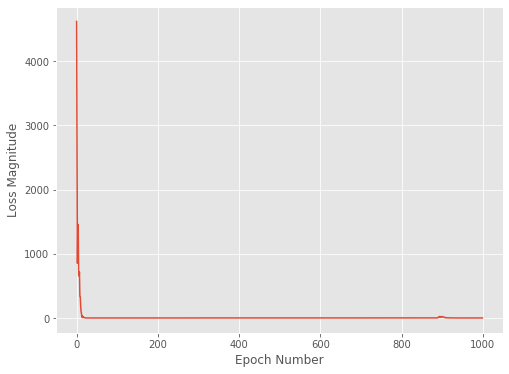

In [17]:
plt.figure(figsize=(8, 6))
plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(hist_prac_1.history["loss"])
plt.show()

In [18]:
model_prac_1.predict([100.0])

array([[211.98833]], dtype=float32)

In [19]:
print("l_0_prac Weights : \n{}".format(l_0_prac.get_weights()))
print("l_1_prac Weights : \n{}".format(l_1_prac.get_weights()))
print("l_2_prac Weights : \n{}".format(l_2_prac.get_weights()))

l_0_prac Weights : 
[array([[ 0.01323746, -0.92538583,  0.05126962,  0.02457277]],
      dtype=float32), array([-2.3624473, -6.125286 ,  4.4003344,  3.4333029], dtype=float32)]
l_1_prac Weights : 
[array([[-0.45514262,  0.03705652,  0.38775   ,  0.7845954 ],
       [ 1.0089486 , -0.14436255,  0.963667  ,  0.03569714],
       [ 0.5135322 ,  0.14002752, -0.58695596,  0.59825635],
       [ 0.12603585, -0.24751878, -0.26802477, -0.42732826]],
      dtype=float32), array([-5.894095,  3.763775, -6.19434 , -1.921872], dtype=float32)]
l_2_prac Weights : 
[array([[-0.87694377],
       [ 0.24922138],
       [-1.048262  ],
       [-0.03207162]], dtype=float32), array([6.2325225], dtype=float32)]
